### BUFN400 Fall 2023---University of Maryland 

# Homework 1: Long-term Returns on Stocks and Bonds

### By James Zhang

### September 6, 2023

There are probably some typos or errors in this homework.  If you find something which seems wrong, please let me know!

<!-- $\newcommand{\E}{\mathrm{E}}$
$\newcommand{\e}{\mathrm{e}}$
$\newcommand{\drm}{\mathrm{\, d}}$
$\newcommand{\var}{\mathrm{var}}$
$\newcommand{\cov}{\mathrm{cov}}$
$\newcommand{\stdev}{\mathrm{stdev}}$
$\newcommand{\sm}{ {\scriptstyle{*}} }$
$\newcommand{\mm}{{\scriptsize @}}$
$\newcommand{\t}{^{\mathsf{T}}}$
$\newcommand{\comma}{\, , \,}$
$\renewcommand{\vec}[1]{\mathbf{#1}}$ -->

$\renewcommand{\E}{\mathrm{E}}$
$\renewcommand{\e}{\mathrm{e}}$
$\renewcommand{\drm}{\mathrm{\, d}}$
$\renewcommand{\var}{\mathrm{var}}$
$\renewcommand{\cov}{\mathrm{cov}}$
$\renewcommand{\stdev}{\mathrm{stdev}}$
$\renewcommand{\sm}{ {\scriptstyle{*}} }$
$\renewcommand{\mm}{{\scriptsize @}}$
$\renewcommand{\t}{^{\mathsf{T}}}$
$\renewcommand{\comma}{\, , \,}$
$\renewcommand{\vec}[1]{\mathbf{#1}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
sp_df = pd.read_csv("sp500.csv")
treasury_df = pd.read_csv("treasury_inflation_data.csv")

# Problem 1

1. Under "CRSP" / "Annual Update" / Index / S&P 500 Indexes", download "CRSP Index File on the S&P 500". Choose the entire time period, monthly data, and all variables.  Show the number of rows and columns, the names of the columns, and the first few rows of data.

In [2]:
print(f"Number of rows: {sp_df.shape[0]}, and number of columns: {sp_df.shape[1]}")
print(f"The columns names are {[column for column in sp_df.columns]}")
sp_df.head()

Number of rows: 1165, and number of columns: 11
The columns names are ['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt', 'usdval', 'usdcnt', 'spindx', 'sprtrn']


,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
0,1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN
1,1926-01-30,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472
2,1926-02-27,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956
3,1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113
4,1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688



2. Under "CRSP" / "Annual Update" / "Index / Treasury and Inflation", download "US Treasury and Inflation Indexes". Choose the entire time period, monthly data, and "Both" (return and level), all variables. Show the number of rows and columns, the names of the columns, and the first few rows of data.


In [3]:
print(f"Number of rows: {treasury_df.shape[0]}, and number of columns: {treasury_df.shape[1]}")
print(f"The columns names are {[column for column in treasury_df.columns]}")
treasury_df.head()

Number of rows: 1165, and number of columns: 11
The columns names are ['caldt', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret', 'cpiret']


,caldt,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
0,1925-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004042,0.002951,0.000000
2,1926-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003237,0.002768,0.000000
3,1926-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002778,0.002778,-0.005587
4,1926-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,0.003072,0.005618



3. Merge the two datasets by date into one dataset. Show the number of rows and columns, the names of the columns, and the first few rows of data. Examine the data to see whether it is what you expect (e.g., data not unepectedly missing, dates line up correctly). If it is not what you expect, fix it!

* Hint: To merge data, you need a key (date). An example of merging data was covered in the Python bootcamp. When unexpeted issues  arise, the options `how='outer'` and `indicator=True` can be helpful for diagnosing problems. To make dates line up correctly, consider using `pd.tseries.offsets.MonthEnd(...)`.


In [4]:
df = sp_df.merge(treasury_df, on="caldt", how="left")
print(f"Number of rows: {df.shape[0]}, and number of columns: {df.shape[1]}")
print(f"The columns names are {[column for column in df.columns]}")
df["caldt"] = pd.to_datetime(df["caldt"])
df = df.set_index("caldt")
df.head()

Number of rows: 1165, and number of columns: 21
The columns names are ['caldt', 'vwretd', 'vwretx', 'ewretd', 'ewretx', 'totval', 'totcnt', 'usdval', 'usdcnt', 'spindx', 'sprtrn', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret', 'cpiret']


,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
caldt,,,,,,,,,,,,,,,,,,,,
1925-12-31,NaN,NaN,NaN,NaN,15236829.5,89,NaN,NaN,12.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-01-30,-0.001783,-0.003980,0.006457,0.003250,15277664.0,89,15236829.5,79.0,12.74,0.022472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004042,0.002951,0.000000
1926-02-27,-0.033296,-0.037876,-0.039979,-0.042451,14712894.9,89,15277664.0,81.0,12.18,-0.043956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003237,0.002768,0.000000
1926-03-31,-0.057708,-0.062007,-0.067915,-0.073275,14012079.2,89,14712894.9,81.0,11.46,-0.059113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002778,0.002778,-0.005587
1926-04-30,0.038522,0.034856,0.031441,0.027121,14500482.2,89,14012079.2,82.0,11.72,0.022688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003072,0.003072,0.005618


4. Draw two plots with multiple series on each plot showing how a 1 dollar investment at the beginning of the series grows month by month over the entire time period. The first plot should consider nominal returns, not adjusted for inflation.  The second series should show real returns, deflated by the consumer price index.  On each plot, there should be multiple stock series and multiple bond series. 

* Hint: Keep in mind that cumulative returns are multiplicative: If $r_0$ and $r_1$ are returns for two adjacent, nonoverlappying periods, then $(1+r_0) \sm (1+r_1) -1$ is the return over two periods.  In terms of "gross returns" $R := 1+r$, we can write the return over two periods as $R_0 \sm R_1$. Numpy and pandas have functions `cumsum` and `cumprod`, one of which might be helpful here. You should try to calculate cumulative returns without writing a slow Python loop! When plotting, consider whether it is economically and financially more meaningful for the y-axis to have a log scale.


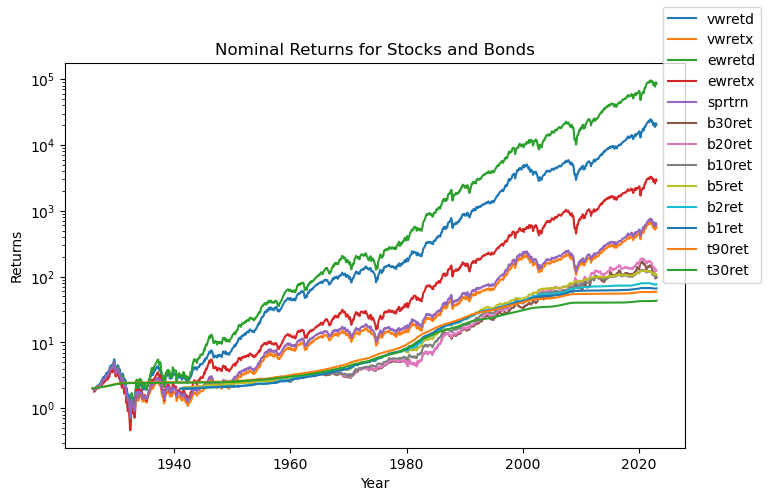

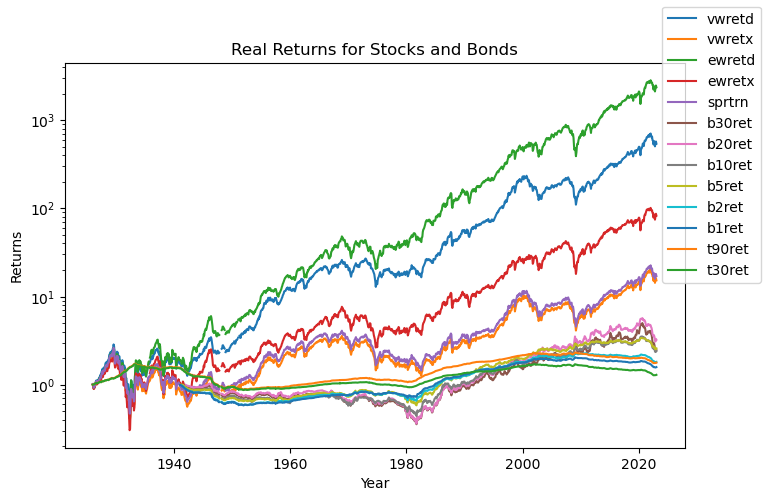

In [8]:
# Defining the securities that I'll be plotting
securities = ["vwretd", "vwretx", "ewretd", "ewretx", "sprtrn", 
              "b30ret", "b20ret", "b10ret", "b5ret", "b2ret", "b1ret", "t90ret", "t30ret"]

# Nominal returns graph
fig, ax = plt.subplots(figsize=(8, 5))
for security in securities:
    # Set the initial price to 1, not NaN for all of these series
    df[security][0] = 1
    ax.plot(np.cumprod(df[security] + 1), label=security)
fig.legend()
ax.set_yscale('log')
ax.set_xlabel("Year")
ax.set_ylabel("Returns")
ax.set_title("Nominal Returns for Stocks and Bonds")
fig.show()

# Real returns graph
fig, ax = plt.subplots(figsize=(8, 5))
for security in securities:
    df[security][0] = 1
    ax.plot(np.cumprod((df[security]  - df["cpiret"] + 1)), label=security)
fig.legend()
ax.set_yscale('log')
ax.set_xlabel("Year")
ax.set_ylabel("Returns")
ax.set_title("Real Returns for Stocks and Bonds")
fig.show()

5. Calculate an annualized difference between returns on stocks ('vwretd') and returns on bonds ('t30ret').


In [9]:
diff = df.dropna()
print(f"{np.mean(diff['vwretd'] - diff['t30ret']) * 12 * 100} %")

8.590019562955256 %


6. Explain in one or two sentences why the returns on the series might be different.

Stocks are more closely tied to economic growth, which leads to more inflation relative to bonds, which are typically lesk risky and therefore appreciate slower since they have less risk-adjusted returns

7. For each date from ten years after the start of the series until the last date in the dataset, make two plots of the cumulative return on all series over the previous 1, 3, and 10 years. The first plot should be nominal returns and the last plot real returns.  Which were the best and worst periods of 1, 3, and 10 years for equity return, bond returns, and inflation?

Answer written after the two graphs.

In [10]:
# Defining the securities that I'll be plotting
securities = ["vwretd", "vwretx", "ewretd", "ewretx", "sprtrn", 
              "b30ret", "b20ret", "b10ret", "b5ret", "b2ret", "b1ret", "t90ret", "t30ret", "cpiret"]
windows = [12, 36, 120]

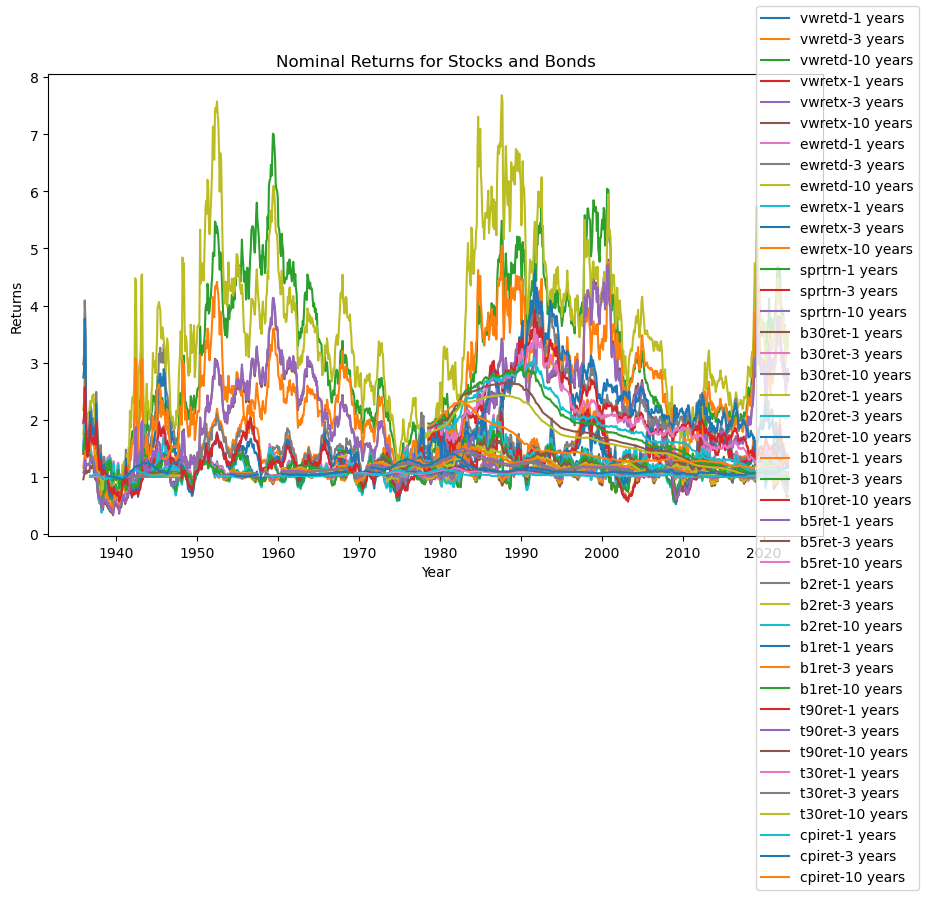

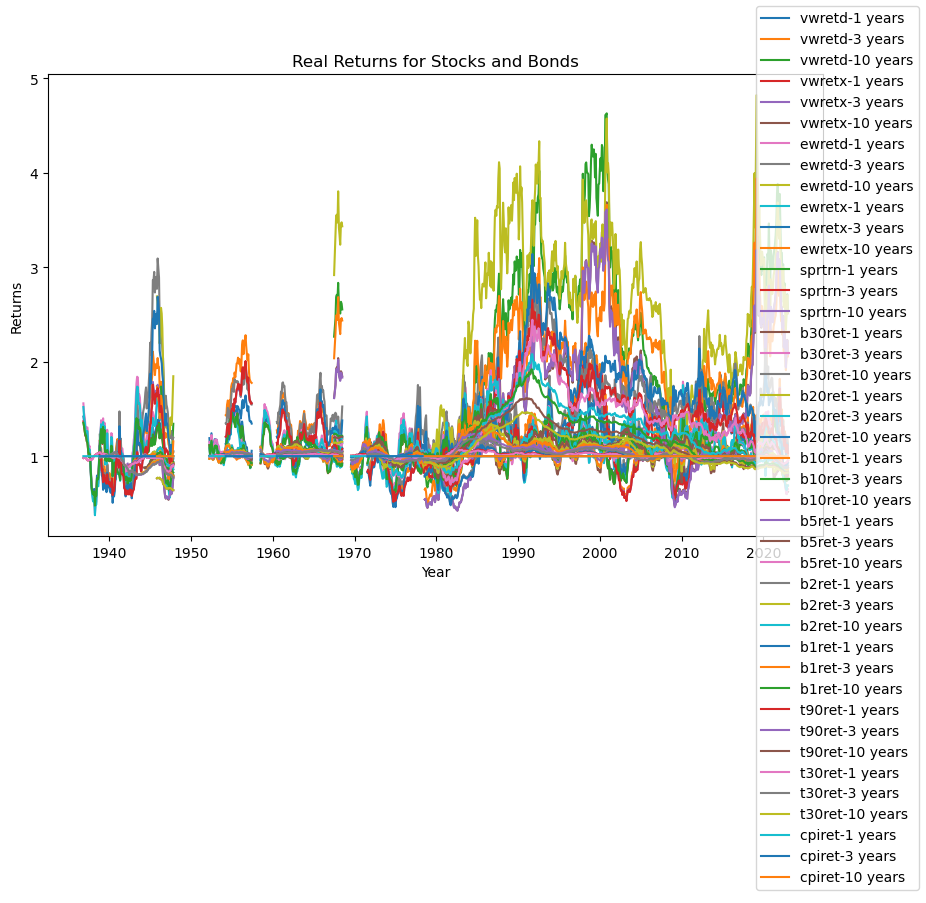

In [12]:
cutoff_date = df.index[0] + dt.timedelta(days=10*365)
nominal_df = pd.DataFrame()
real_df = pd.DataFrame()

# Nominal returns graph
for security in securities:
    for window in windows:
        nominal_df[f"{security}-{int(window/12)}"] = (df[security] + 1).rolling(window=window).apply(np.prod)
        real_df[f"{security}-{int(window/12)}"] = ((df[security] + 1 - df["cpiret"])).rolling(window=window).apply(np.prod)

nominal_df = nominal_df[nominal_df.index >= cutoff_date]
real_df = real_df[real_df.index >= cutoff_date]

fig, ax = plt.subplots(figsize=(10, 6))
fig2, ax2 = plt.subplots(figsize=(10, 6))

for security in securities:
    for window in windows:
        ax.plot(nominal_df[f"{security}-{int(window/12)}"], label=f"{security}-{int(window/12)} years")
        ax2.plot(real_df[f"{security}-{int(window/12)}"], label=f"{security}-{int(window/12)} years")
        
fig.legend()
# ax.set_yscale('log')
ax.set_xlabel("Year")
ax.set_ylabel("Returns")
ax.set_title("Nominal Returns for Stocks and Bonds")
fig.show()

fig2.legend()
# ax2.set_yscale('log')
ax2.set_xlabel("Year")
ax2.set_ylabel("Returns")
ax2.set_title("Real Returns for Stocks and Bonds")
fig2.show()

In [13]:
mp = {"vwretd" : "stock", "t30ret" : "bonds", "cpiret" :"inflation"}
columns = ["vwretd", "t30ret"]
for col in columns:
    for window in windows:
        name = f"{col}-{int(window/12)}"
        print(f"The best {int(window/12)} year period of {mp[col]} returns was on {real_df.index[np.argmax(real_df[name])]} = {np.max(real_df[name]) - 1}")
        print(f"The worst {int(window/12)} year period of {mp[col]} returns was on {real_df.index[np.argmin(real_df[name])]} = {np.min(real_df[name]) - 1}")


The best 1 year period of stock returns was on 1983-06-30 00:00:00 = 0.5732176832682687
The worst 1 year period of stock returns was on 1938-03-31 00:00:00 = -0.5076857399701419
The best 3 year period of stock returns was on 1956-08-31 00:00:00 = 1.2813847013074162
The worst 3 year period of stock returns was on 2003-03-31 00:00:00 = -0.44784537206845587
The best 10 year period of stock returns was on 2000-10-31 00:00:00 = 3.6311051560940975
The worst 10 year period of stock returns was on 2009-02-27 00:00:00 = -0.4371789226709306
The best 1 year period of bonds returns was on 1982-04-30 00:00:00 = 0.07257077183964955
The worst 1 year period of bonds returns was on 1947-03-31 00:00:00 = -0.1660534567911245
The best 3 year period of bonds returns was on 1984-07-31 00:00:00 = 0.18536623768840776
The worst 3 year period of bonds returns was on 1947-09-30 00:00:00 = -0.22777072505330875
The best 10 year period of bonds returns was on 1990-06-29 00:00:00 = 0.46669516687482004
The worst 10 y

In [14]:
for window in windows:
    name = f"cpiret-{int(window/12)}"
    print(f"The best {int(window/12)} year period of inflation returns was on {nominal_df.index[np.argmax(nominal_df[name])]} = {np.max(nominal_df[name]) - 1}")
    print(f"The worst {int(window/12)} year period of inflation returns was on {nominal_df.index[np.argmin(nominal_df[name])]} = {np.min(nominal_df[name]) - 1}")

The best 1 year period of inflation returns was on 1947-03-31 00:00:00 = 0.19672218598713442
The worst 1 year period of inflation returns was on 1938-10-31 00:00:00 = -0.04109563473700817
The best 3 year period of inflation returns was on 1981-09-30 00:00:00 = 0.4015075641431556
The worst 3 year period of inflation returns was on 1940-09-30 00:00:00 = -0.04109551014258339
The best 10 year period of inflation returns was on 1982-07-30 00:00:00 = 1.326977941904448
The worst 10 year period of inflation returns was on 2018-07-31 00:00:00 = 0.14566725612504294


# Problem 2

1. Consider the return columns from the previous exercise ending in `ret` or `retd`. Display the results of the function `df.describe()` (where `df` is the name of the dataframe of merged monthly data in Exercise 1). Now construct your own dataframe from scratch (without using `df.describe()`) showing various summary statistics describing the return series, including mean, variance, standard deviation, max, min, number of missing observations, and number of returns equal to exactly zero. Place the statistics in a dataframe where the rows are the names of the relevant variables and the columns are the names of the various statistics (the opposite of `df.describe()`). Are your results consistent with the results of `df.describe()`?


In [15]:
real_df.describe()

,vwretd-1,vwretd-3,vwretd-10,vwretx-1,vwretx-3,vwretx-10,ewretd-1,ewretd-3,ewretd-10,ewretx-1,...,b1ret-10,t90ret-1,t90ret-3,t90ret-10,t30ret-1,t30ret-3,t30ret-10,cpiret-1,cpiret-3,cpiret-10
count,959.000000,863.000000,572.000000,959.000000,863.000000,572.000000,959.000000,863.000000,572.000000,959.000000,...,547.000000,959.000000,863.000000,572.000000,959.000000,863.000000,572.000000,9.590000e+02,8.630000e+02,5.720000e+02
mean,1.082699,1.277167,2.152530,1.046249,1.154766,1.598852,1.104294,1.341052,2.536390,1.068752,...,1.230289,1.003456,1.019283,1.132405,0.999709,1.007363,1.079249,1.000000e+00,1.000000e+00,1.000000e+00
std,0.179049,0.349126,0.952340,0.174130,0.320368,0.744499,0.207037,0.362745,0.833792,0.200454,...,0.267846,0.035095,0.084079,0.225465,0.032603,0.075183,0.187875,2.664999e-16,6.067995e-16,2.329991e-15
min,0.492314,0.552155,0.562821,0.464123,0.516951,0.423434,0.393914,0.519129,0.753669,0.374816,...,0.827758,0.834241,0.773934,0.639576,0.833947,0.772229,0.640225,1.000000e+00,1.000000e+00,1.000000e+00
25%,0.977302,1.028645,1.400790,0.942062,0.926380,0.987461,0.985262,1.132518,1.967058,0.948822,...,0.977819,0.986857,0.968905,0.939213,0.985277,0.963902,0.919652,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.096849,1.276819,2.083743,1.062644,1.163533,1.569196,1.109445,1.332691,2.656113,1.078723,...,1.199931,1.007977,1.028445,1.133978,1.004072,1.017560,1.094621,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.198913,1.471772,2.828854,1.162969,1.338393,2.043150,1.221112,1.528660,3.119453,1.181926,...,1.390152,1.022829,1.065250,1.276611,1.017986,1.054098,1.209311,1.000000e+00,1.000000e+00,1.000000e+00
max,1.573218,2.281385,4.631105,1.502912,2.068901,3.689966,1.841444,3.093775,4.822833,1.752708,...,1.920466,1.098273,1.236472,1.614076,1.072571,1.185366,1.466695,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
describe_df = pd.DataFrame(columns=real_df.columns)
describe_df.loc["count"] = real_df.count()
describe_df.loc["mean"] = real_df.mean()
describe_df.loc["std"] = real_df.std()
describe_df.loc["min"] = real_df.min()
describe_df.loc["25%"] = real_df.quantile(q=0.25)
describe_df.loc["50%"] = real_df.quantile()
describe_df.loc["75%"] = real_df.quantile(q=0.75)
describe_df.loc["max"] = real_df.max()
describe_df

,vwretd-1,vwretd-3,vwretd-10,vwretx-1,vwretx-3,vwretx-10,ewretd-1,ewretd-3,ewretd-10,ewretx-1,...,b1ret-10,t90ret-1,t90ret-3,t90ret-10,t30ret-1,t30ret-3,t30ret-10,cpiret-1,cpiret-3,cpiret-10
count,959.000000,863.000000,572.000000,959.000000,863.000000,572.000000,959.000000,863.000000,572.000000,959.000000,...,547.000000,959.000000,863.000000,572.000000,959.000000,863.000000,572.000000,9.590000e+02,8.630000e+02,5.720000e+02
mean,1.082699,1.277167,2.152530,1.046249,1.154766,1.598852,1.104294,1.341052,2.536390,1.068752,...,1.230289,1.003456,1.019283,1.132405,0.999709,1.007363,1.079249,1.000000e+00,1.000000e+00,1.000000e+00
std,0.179049,0.349126,0.952340,0.174130,0.320368,0.744499,0.207037,0.362745,0.833792,0.200454,...,0.267846,0.035095,0.084079,0.225465,0.032603,0.075183,0.187875,2.664999e-16,6.067995e-16,2.329991e-15
min,0.492314,0.552155,0.562821,0.464123,0.516951,0.423434,0.393914,0.519129,0.753669,0.374816,...,0.827758,0.834241,0.773934,0.639576,0.833947,0.772229,0.640225,1.000000e+00,1.000000e+00,1.000000e+00
25%,0.977302,1.028645,1.400790,0.942062,0.926380,0.987461,0.985262,1.132518,1.967058,0.948822,...,0.977819,0.986857,0.968905,0.939213,0.985277,0.963902,0.919652,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.096849,1.276819,2.083743,1.062644,1.163533,1.569196,1.109445,1.332691,2.656113,1.078723,...,1.199931,1.007977,1.028445,1.133978,1.004072,1.017560,1.094621,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.198913,1.471772,2.828854,1.162969,1.338393,2.043150,1.221112,1.528660,3.119453,1.181926,...,1.390152,1.022829,1.065250,1.276611,1.017986,1.054098,1.209311,1.000000e+00,1.000000e+00,1.000000e+00
max,1.573218,2.281385,4.631105,1.502912,2.068901,3.689966,1.841444,3.093775,4.822833,1.752708,...,1.920466,1.098273,1.236472,1.614076,1.072571,1.185366,1.466695,1.000000e+00,1.000000e+00,1.000000e+00



2. Calculate an "annualized historical mean return" by multiplying the monthly mean return by 12 (months per year). Does this number (a scalar) appear to be financially reasonable?

These numbers don't seem to be reasonable because they suggest that for most of these stocks and bonds you'll make around 12 or more times your initial investment after one year.

In [17]:
pd.DataFrame(describe_df.loc["mean"] * 12).T

,vwretd-1,vwretd-3,vwretd-10,vwretx-1,vwretx-3,vwretx-10,ewretd-1,ewretd-3,ewretd-10,ewretx-1,...,b1ret-10,t90ret-1,t90ret-3,t90ret-10,t30ret-1,t30ret-3,t30ret-10,cpiret-1,cpiret-3,cpiret-10
mean,12.992391,15.326008,25.830356,12.554982,13.857188,19.186227,13.251533,16.092618,30.436679,12.825025,...,14.763468,12.041478,12.231399,13.588866,11.996508,12.088358,12.950986,12.0,12.0,12.0


3. Review basic statistical concepts, like mean, variance, standard deviation, and covariance. Recall that the standard deviation is the square root of the variance. Why do many researchers and practitioners prefer to look at numbers which are standard deviations rather than numbers which are variances?

Standard deviations are more intuitive since they have the same units as the data that it's describing deviations from, plus standard deviations are always less than or equal to the variances. Therefore, they are easier to interpret than variances.

4. If $N$ is the number of observations in a series $x$, the sample standard deviation is sometimes calculated by  dividing by $N$ and sometimes by dividing by $N-1$, like `np.sqrt(np.sum((x - x.mean())**2) / N)` or `np.sqrt(np.sum((x - x.mean())**2) / (N-1))`. Which version does pandas (`df.std()` for dataframe `df`) or numpy (`x.std()` for array `x`) use by default? (Hint: If `ret` is a return series, the pandas standard deviation can be compared with the numpy standard deviation by using the pandas function `to_numpy`.)

After doing the calculations, we find that the Pandas function divides by $N - 1$ whereas the Numpy function divides by $N$.

In [18]:
x = real_df['vwretd-1']
N = x.count() # only non-nan values
print(f"Divide by N = {np.sqrt(np.sum((x - x.mean()) ** 2) / N)}")
print(f"Divide by N-1 = {np.sqrt(np.sum((x - x.mean()) ** 2) / (N - 1))}")
print(f"Pandas std function = {x.std()}")
print(f"Numpy std function = {x.dropna().to_numpy().std()}")

Divide by N = 0.17895556049205458
Divide by N-1 = 0.17904893673659902
Pandas std function = 0.17904893673659913
Numpy std function = 0.17895556049205458


5. Which version of standard deviation (with $N$ or $N-1$) do you think is most appropriate for a time series of returns? (This is a non-trivial question whose answer depends on combining finance thinking with statistical definitions.)

Dividing by $N-1$ is more unbiased and therefore appropriate for a time series of returns since it is a sample, and not the returns for all time. This adjustment of dividing by $N-1$ as opposed to simply $N$ is known as Bessel's correction, and it is necessary due to the constraint imposed by calculating the sample mean and therefore the one less degree of freedom. Suppose you have $N$ observations in the sample dataset. Initially you calculate the sample mean $\mu$. Now as calculating the standard deviation, for the first $N-1$ points, these observations can be of any value. However, after the first $N-1$ points, the $N-th$ point has only one value that satisfies the originally calculated sample mean. This is why there's one less degree of freedom, and therefore why we divide by $N-1$.


6. The standard deviation of returns is often called **volatility**. Calculate an "annualized historical return volatility" by multiplying the monthly sample volatility (a scalar) by $\sqrt{12}$. Multiplying by $\sqrt{12}$ is appropriate when monthly returns are approximately uncorrelated.

In [19]:
pd.DataFrame(real_df.std() * np.sqrt(12)).T

,vwretd-1,vwretd-3,vwretd-10,vwretx-1,vwretx-3,vwretx-10,ewretd-1,ewretd-3,ewretd-10,ewretx-1,...,b1ret-10,t90ret-1,t90ret-3,t90ret-10,t30ret-1,t30ret-3,t30ret-10,cpiret-1,cpiret-3,cpiret-10
0,0.620244,1.209407,3.299004,0.603205,1.109786,2.579021,0.717196,1.256585,2.88834,0.694393,...,0.927846,0.121572,0.291259,0.781034,0.112941,0.260442,0.650817,9.231827e-16,2.102015e-15,8.071326e-15



7. Check whether returns are indeed approximately uncorrelated by calculating the **autocorrelation** of the various return series. (Hint: Use the pandas `autocorr` function.)

Stock returns seem to be relatively uncorrelated, whereas bonds and inflation returns series seem to be very slightly correlated.

In [20]:
lags = [1, 2, 3, 4, 5, 10, 20, 50]
for series in mp:
    for lag in lags:
        print(f"Correlation of {mp[series]} with {lag} lags = {df[series].autocorr(lag=lag)}")
    print()

Correlation of stock with 1 lags = 0.0646445687831667
Correlation of stock with 2 lags = -0.03553248586235495
Correlation of stock with 3 lags = -0.10239074580147037
Correlation of stock with 4 lags = 0.02982125998181802
Correlation of stock with 5 lags = 0.06235505112026205
Correlation of stock with 10 lags = -0.0037954508978008373
Correlation of stock with 20 lags = -0.06472551076119515
Correlation of stock with 50 lags = -0.035081677768576104

Correlation of bonds with 1 lags = 0.08640134726973192
Correlation of bonds with 2 lags = 0.08319931867861462
Correlation of bonds with 3 lags = 0.08281164367272667
Correlation of bonds with 4 lags = 0.08504885542755848
Correlation of bonds with 5 lags = 0.05248345969624133
Correlation of bonds with 10 lags = 0.08194257895346181
Correlation of bonds with 20 lags = 0.06786146013500954
Correlation of bonds with 50 lags = 0.05898281576652038

Correlation of inflation with 1 lags = 0.4873683420324351
Correlation of inflation with 2 lags = 0.361269

8. Finance researchers and practitioners often work with **log returns**. If $r=0.02$ is the return on a security (i.e., $+2$ percent), then the **gross return** is $1+r = 1.02$, and the **log return** is $\log(1+r) = \log(1.02) \approx 0.01980$. Explain intuitively why the log return is less than the return. Explain why finance researchers and practitioners prefer to use natural logarithms base $\e \approx 2.718$ rather than base 2 (preferred by computer scientists) or base 10 (preferred by natural scientists).

Log return is less than normal returns because $\log(x) \leq x \ \forall \ x > 0$, and this can be easily intuitively understood by plotting the graphs. Finance researchers typically prefer using log returns than arithmetic returns because it eliminates the effect of various compounding frequencies of different returns series, so the returns series of different assets can be compared.

9. When being careful, researchers and practitioners often define **volatility** as the **standard deviation of log returns**. If it is important to distinguish the standard deviation of returns and the standard deviation of log returns, the standard deviation of log returns is often referred to as **Black-Scholes volatility** because this is the volatility definition used in the Black-Scholes model of option pricing. Compare the Black-Scholes historical volatility (i.e., log volatility) with the non-logged historical volatility used above. Is there much difference?

There is a little difference in the historical volatility when compared to the Black-Scholes volatility when the numbers are small, and this can be explained graphically as $\log(x) \approx x$ when $x$ is close to 0. However, as $x$ increases, we can see differences in the volatility. To be more specific, in "vwretd", the historical annual mean volatility is $3.29$, whereas the Black-Scholes volatility is $1.74$. An example of when the numbers are small is "cpiret-10", as the normal volatility is $0.007614$ and the Black-Scholes volatility is $0.007648$.

In [21]:
# Non-logged historical volatility
display(pd.DataFrame(real_df.std() * np.sqrt(12)).T)
print()

# Black-Scholes Volatility using in option pricing
display(pd.DataFrame(np.log(real_df).std() * np.sqrt(12)).T)

,vwretd-1,vwretd-3,vwretd-10,vwretx-1,vwretx-3,vwretx-10,ewretd-1,ewretd-3,ewretd-10,ewretx-1,...,b1ret-10,t90ret-1,t90ret-3,t90ret-10,t30ret-1,t30ret-3,t30ret-10,cpiret-1,cpiret-3,cpiret-10
0,0.620244,1.209407,3.299004,0.603205,1.109786,2.579021,0.717196,1.256585,2.88834,0.694393,...,0.927846,0.121572,0.291259,0.781034,0.112941,0.260442,0.650817,9.231827e-16,2.102015e-15,8.071326e-15


,vwretd-1,vwretd-3,vwretd-10,vwretx-1,vwretx-3,vwretx-10,ewretd-1,ewretd-3,ewretd-10,ewretx-1,...,b1ret-10,t90ret-1,t90ret-3,t90ret-10,t30ret-1,t30ret-3,t30ret-10,cpiret-1,cpiret-3,cpiret-10
0,0.607982,0.980338,1.742562,0.614224,0.997359,1.843996,0.683111,0.956432,1.326941,0.687577,...,0.739,0.124283,0.290292,0.703832,0.116279,0.264177,0.619108,5.111140e-16,1.008548e-15,1.781766e-15



10. You might wonder why researchers and practitioners like to use log returns and also like to use gross returns $1+r$.  One reason has do do with calculating variances and standard deviations of returns.  Using the non-logged returns $r$, the two-month return is technically $(1+r_0) \sm (1+r_1) - 1)$; this is a somewhat messy formula. In terms of gross returns $R = 1 + r$, this can be written more simply as $R_0 \sm  R_1$. In terms of log returns $\hat{r} := \log (1 + r)$, the two-month return is even nicer, $\hat{r}_0 + \hat{r}_1$.  Now recall that the variance of the sum of two random variables $x$ and $y$ satisfies $\var[x+y] + \var[x] + \var[y] + 2 \sm \cov[x,y]$. If the covariance term is zero, the random variables are uncorrelated, so the variance of the sum is the sum of the variances.  This is very convenient mathematically. Finance researchers and practitioners like log returns because this formula applies exactly to log returns but only approximatedly to non-log returns, which are not sums of returns over shorter periods.

# Problem 3

1. Download "S&P 500 Indexes" data as in problem 1, with one difference: Download the daily versions of the data rather than the monthly versions. Convert dates to `datetime64[ns]` formats. Show the first and last rows and number of observations.

In [180]:
daily_df = pd.read_csv("sp500_daily.csv")
daily_df['caldt'] = daily_df['caldt'].astype('datetime64[ns]')
daily_df = daily_df.set_index("caldt")

print("The first row is")
display(df.head(1))

print("The last row is ")
display(df.tail(1))

print("The number of (non-NaN) observations for each return series is ")
pd.DataFrame(df.count()).T

The first row is


,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
caldt,,,,,,,,,,,,,,,,,,,,
1925-12-31,1.0,1.0,1.0,1.0,15236829.5,89,NaN,NaN,12.46,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN


The last row is 


,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
caldt,,,,,,,,,,,,,,,,,,,,
2022-12-30,-0.058784,-0.06017,-0.048775,-0.050741,3.351180e+10,503,3.565213e+10,503.0,3839.5,-0.058971,-0.035953,-0.025772,-0.018566,-0.015065,-0.008377,0.000845,0.004019,0.00328,0.003379,-0.00307


The number of (non-NaN) observations for each return series is 


,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
0,1165,1165,1165,1165,1165,1165,1164,1164,1165,1165,964,962,970,970,971,974,974,1153,1153,1152


2. Calculate the amount to which one dollar, invested at the earliest date in the dataset, grows day by day until the last date in the dataset. You can use 'vwretd'.

I calculated it by taking the gross returns and taking the cumulative product.

In [156]:
f"A one dollar investment turns into {np.cumprod(daily_df['vwretd'] + 1).tail(1).values[0]} dollars over the course of the dataset"

'A one dollar investment turns into 9806.65006047523 dollars over the course of the dataset'

3. Using 'vwretd' as an example, compare the cumulative daily and monthly returns by plotting returns of both on the same plot. Should the returns be almost identical? Are the returns almost identical? 

The returns should almost be identical, since the rows in the monthly dataframe should all be in the daily dataframe. Thus, the graphs contain many of the same points, and we can confirm this since the graphs are almost identical.

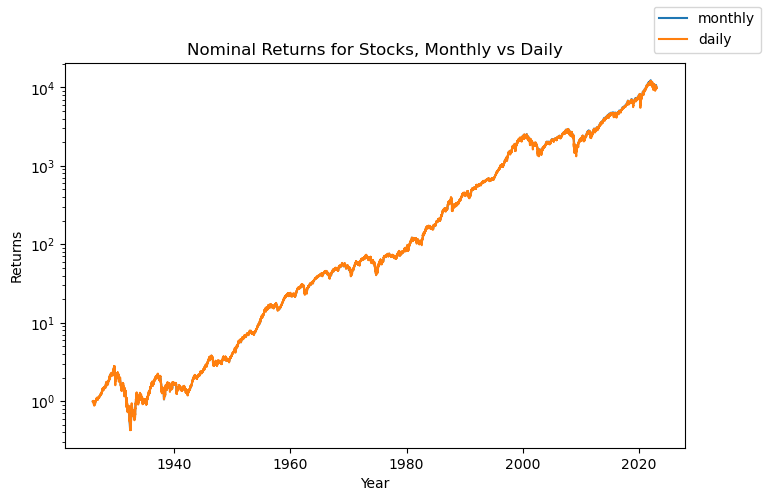

In [181]:
# Monthly returns graph
fig, ax = plt.subplots(figsize=(8, 5))

# Set the initial returns to 0, not NaN for all of these series
df["vwretd"][0] = 0
daily_df["vwretd"][0] = 0
ax.plot(np.cumprod(df["vwretd"] + 1), label="monthly")
ax.plot(np.cumprod(daily_df["vwretd"] + 1), label="daily")

fig.legend()
ax.set_yscale('log')
ax.set_xlabel("Year")
ax.set_ylabel("Returns")
ax.set_title("Nominal Returns for Stocks, Monthly vs Daily")
fig.show()

4. From series of daily (non-log) returns and daily log returns, create corresponding monthly series in which each monthly observation is the sample standard deviation of the daily returns for the days in that month. Plot both the non-log and log volatilites on the same plot. Are these volatilities similar? 

* Hint: One way to construct the monthly series is to construct a variable which identifies the month in a convenient manner (e.g., using `pd.tseries.offsets.MonthEnd(0)`), then use `pd.groupby(...).std(...)` on this variable. The `pd.groupby` function returns a dataframe in which the variable grouped by is an index. For plotting, you might use `df.reset_index(drop=False)` to convert the index (identifying the month) into a column of the dataframe.

In [182]:
daily_df = daily_df.dropna().reset_index()
daily_df['Month'] = daily_df['caldt'].dt.to_period('M')
# Gross non-log returns = R_0 * R_1 + ...
daily_df["gross non-log vwretd"] = np.cumprod(daily_df["vwretd"] + 1)
# Gross log returns = log(1 + r_1) + log(1 + r_2) + ...
daily_df["gross log vwretd"] = np.cumsum((np.log(daily_df["vwretd"] + 1)))

,gross non-log vwretd,gross log vwretd
Month,,
1962-07,0.011929,0.011654
1962-08,0.015802,0.015025
1962-09,0.019554,0.018853
1962-10,0.018454,0.018352
1962-11,0.030357,0.027906
...,...,...
2022-08,9.999220,0.022992
2022-09,15.559967,0.038615
2022-10,10.416049,0.026536


<Axes: xlabel='Month'>

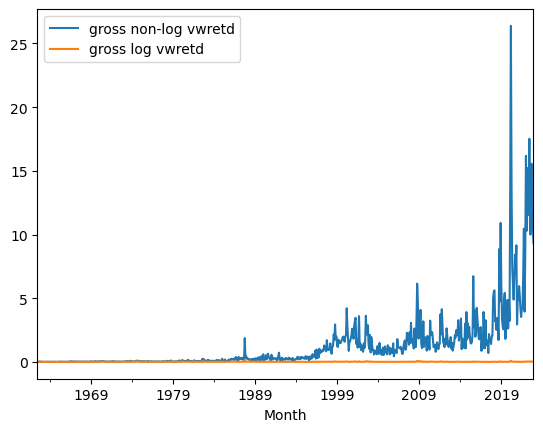

In [203]:
monthly_std = pd.DataFrame()
monthly_std["gross non-log vwretd"] = daily_df.groupby('Month')['gross non-log vwretd'].std()
monthly_std["gross log vwretd"] = daily_df.groupby('Month')['gross log vwretd'].std()
display(monthly_std)
monthly_std.plot()

,gross non-log vwretd,gross log vwretd
caldt,,
1962-07-03,1.011155,0.011093
1962-07-05,1.016700,0.016562
1962-07-06,1.005195,0.005182
1962-07-09,1.012290,0.012215
1962-07-10,1.023597,0.023323
...,...,...
2022-12-23,405.044420,6.003997
2022-12-27,403.374017,5.999864
2022-12-28,398.509326,5.987731


<Axes: xlabel='caldt'>

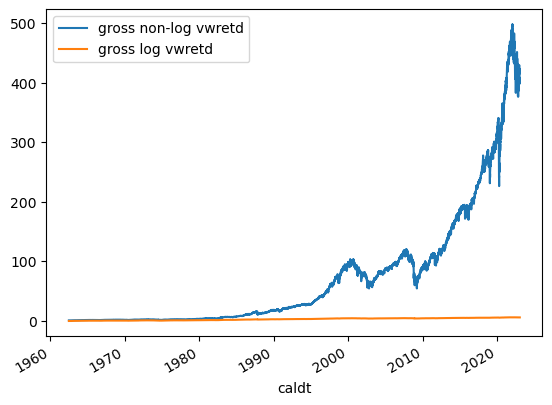

In [204]:
# Plotting daily gross non-log returns and log returns
x = daily_df[["caldt", "gross non-log vwretd", "gross log vwretd"]]
x.set_index("caldt", inplace=True)
display(x)
x.plot()

These volatilities are not that similar. The Black-Scholes volatiity is much closer to 0 throughout the dataset.

5. Describe briefly what you can infer about financial history from the plots.  Are there periods of very high volatility and very low volatility?  Can you tell by comparing plots whether volatility tends to be higher when returns have been low in recent months?

Generally, there are periods of high and low volatility. The general trend is that volatility has been increasing rapidly in the past 20 years, possibly due to the meteoric rise in electronic trading / high frequency trading and trading becoming more feasible for anyone to do. With stocks especially, and the desire for many parties to trade and beat the market, this additional interest could be generating additional volatility than in previous years. Furthermore, there tends to be a direct relationship between returns and volatility. Higher returns tend to be associated with higher volatility, and for intelligent traders, higher volatility can then lead to higher profits, leading to a cycle, in some sense.